In [87]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [73]:
data = pd.read_csv("SP500.csv",parse_dates=["Date"],index_col=["Date"])
data

,AAPL,MSFT,AMZN,GOOGL,BRK-B,GOOG,UNH,TSLA,XOM,JNJ,...,ALK,LUMN,MHK,NWL,RL,FOX,DVA,DISH,VNO,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-02,108.77,202.33,150.22,81.22,204.31,81.30,312.10,133.50,33.99,138.69,...,38.27,8.88,114.69,18.91,67.43,26.89,89.07,25.82,32.50,13.19
2020-11-03,110.44,206.43,152.42,82.28,206.63,82.51,321.35,141.30,33.41,138.50,...,38.56,9.11,116.99,19.50,69.12,26.70,92.95,26.29,34.03,13.38
2020-11-04,114.95,216.39,162.06,87.29,206.17,87.46,354.56,140.33,33.23,139.40,...,37.80,8.80,118.09,18.87,68.71,25.43,96.04,26.51,31.64,13.37
2020-11-05,119.03,223.29,166.10,88.12,207.45,88.17,354.40,146.03,33.17,139.76,...,39.18,9.28,122.17,19.56,69.93,26.37,98.15,27.39,31.85,13.90
2020-11-06,118.69,223.72,165.57,87.99,208.85,88.09,347.46,143.32,32.78,142.25,...,38.26,9.09,120.58,18.88,68.23,25.60,98.62,27.71,30.37,15.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-26,149.35,231.32,115.66,94.93,288.52,94.82,543.17,224.64,107.14,172.21,...,42.86,7.06,98.60,15.74,93.52,27.25,99.31,15.09,23.38,17.20
2022-10-27,144.80,226.75,110.96,92.22,289.88,92.60,541.80,225.09,107.55,172.31,...,43.27,6.97,98.25,15.67,91.82,26.57,96.75,15.19,23.23,16.94
2022-10-28,155.74,235.87,103.41,96.29,299.63,96.58,551.24,228.52,110.70,174.87,...,44.43,7.34,96.72,15.05,93.28,27.21,70.54,15.40,23.80,17.14


In [74]:
data = data[['T','INTC','META','GOOGL','AAPL','ADBE','COST','WMT','TSLA']]

In [75]:
data_v = data[['T','INTC','META','GOOGL','AAPL']]
data_v

,T,INTC,META,GOOGL,AAPL
Date,,,,,
2020-11-02,20.65,44.46,261.36,81.22,108.77
2020-11-03,20.74,44.85,265.30,82.28,110.44
2020-11-04,20.42,45.70,287.38,87.29,114.95
2020-11-05,20.78,45.68,294.68,88.12,119.03
2020-11-06,20.73,45.39,293.41,87.99,118.69
...,...,...,...,...,...
2022-10-26,18.14,27.21,129.82,94.93,149.35
2022-10-27,18.03,26.27,97.94,92.22,144.80
2022-10-28,18.48,29.07,99.20,96.29,155.74


In [76]:
data_g = data[['ADBE','COST','WMT','TSLA']]
data_g

,ADBE,COST,WMT,TSLA
Date,,,,
2020-11-02,444.94,364.39,140.40,133.50
2020-11-03,454.02,371.96,142.78,141.30
2020-11-04,487.23,376.17,141.96,140.33
2020-11-05,496.47,385.23,143.47,146.03
2020-11-06,494.63,385.66,145.77,143.32
...,...,...,...,...
2022-10-26,320.48,499.45,141.14,224.64
2022-10-27,318.65,496.54,140.73,225.09
2022-10-28,325.68,510.87,142.51,228.52


In [77]:
value_price_raw = data_v.mean(axis = "columns")
value_price = value_price_raw/value_price_raw[0]*100
value_price_return = value_price.pct_change().dropna().add(1).cumprod()-1
value_price_return

Date
2020-11-03    0.013844
2020-11-04    0.076056
2020-11-05    0.100356
2020-11-06    0.096329
2020-11-09    0.065194
                ...   
2022-10-26   -0.187836
2022-10-27   -0.265655
2022-10-28   -0.227859
2022-10-31   -0.249371
2022-11-01   -0.258471
Length: 503, dtype: float64

In [78]:
growth_price_raw = data_g.mean(axis = "columns")
growth_price = growth_price_raw/growth_price_raw[0]*100
growth_price_return = growth_price.pct_change().dropna().add(1).cumprod()-1
growth_price_return

Date
2020-11-03    0.024769
2020-11-04    0.057661
2020-11-05    0.081211
2020-11-06    0.079531
2020-11-09    0.034037
                ...   
2022-10-26    0.094606
2022-10-27    0.090267
2022-10-28    0.114796
2022-10-31    0.098446
2022-11-01    0.094403
Length: 503, dtype: float64

In [79]:
dif = growth_price_return-value_price_return
dif

Date
2020-11-03    0.010924
2020-11-04   -0.018395
2020-11-05   -0.019145
2020-11-06   -0.016798
2020-11-09   -0.031157
                ...   
2022-10-26    0.282442
2022-10-27    0.355922
2022-10-28    0.342654
2022-10-31    0.347817
2022-11-01    0.352874
Length: 503, dtype: float64

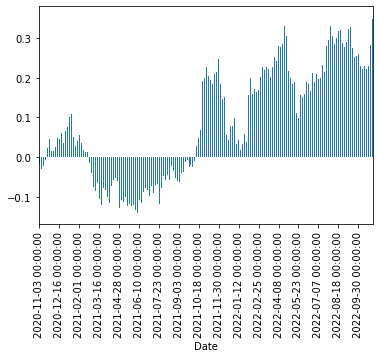

In [80]:
ax = plt.subplots(1,1)[1]
dif.plot(kind = 'bar')
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))

In [81]:
interest_rate = pd.read_csv("10Y_I.csv",parse_dates=["Date"],index_col=["Date"])
interest_rate_change = interest_rate['interest_rate'].pct_change().dropna().add(1).cumprod()-1
interest_rate_change

Date
2020-11-04   -0.133333
2020-11-05   -0.122222
2020-11-06   -0.077778
2020-11-09    0.066667
2020-11-10    0.088889
                ...   
2022-10-26    3.488889
2022-10-27    3.400000
2022-10-28    3.466667
2022-10-31    3.555556
2022-11-01    3.522222
Name: interest_rate, Length: 499, dtype: float64

<AxesSubplot:xlabel='Date'>

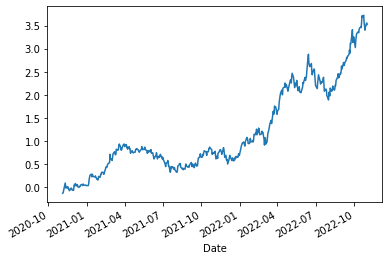

In [82]:
interest_rate_change.plot(kind = 'line')

In [102]:
reg = pd.concat([interest_rate_change.to_frame(),dif.to_frame(name='return_dif'),
                 growth_price_return.to_frame(name='return_g'),value_price_return.to_frame(name='return_v')],
                axis="columns")
reg

,interest_rate,return_dif,return_g,return_v
Date,,,,
2020-11-03,NaN,0.010924,0.024769,0.013844
2020-11-04,-0.133333,-0.018395,0.057661,0.076056
2020-11-05,-0.122222,-0.019145,0.081211,0.100356
2020-11-06,-0.077778,-0.016798,0.079531,0.096329
2020-11-09,0.066667,-0.031157,0.034037,0.065194
...,...,...,...,...
2022-10-26,3.488889,0.282442,0.094606,-0.187836
2022-10-27,3.400000,0.355922,0.090267,-0.265655
2022-10-28,3.466667,0.342654,0.114796,-0.227859


In [103]:
sm.OLS(reg['return_dif'], sm.add_constant(reg['interest_rate']),missing='drop').fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             return_dif   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     527.4
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           4.82e-80
Time:                        23:23:45   Log-Likelihood:                 450.44
No. Observations:                 498   AIC:                            -896.9
Df Residuals:                     496   BIC:                            -888.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0405      0.007     -5.716      0.000      -0.054      -0.027
interest_rate     0.1070      0.005     22.966      0.000       0.098       0.116
==============================================================================
Omnibus:                       87.913   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.726
Skew:                           0.010   Prob(JB):                     5.21e-05
Kurtosis:                       2.025   Cond. No.                         3.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
sm.OLS(reg['return_g'], sm.add_constant(reg['interest_rate']),missing='drop').fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               return_g   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     20.94
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           6.00e-06
Time:                        23:23:49   Log-Likelihood:                 255.12
No. Observations:                 498   AIC:                            -506.2
Df Residuals:                     496   BIC:                            -497.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2840      0.010     27.110      0.000       0.263       0.305
interest_rate    -0.0315      0.007     -4.576      0.000      -0.045      -0.018
==============================================================================
Omnibus:                       31.195   Durbin-Watson:                   0.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.612
Skew:                           0.434   Prob(JB):                     7.46e-06
Kurtosis:                       2.380   Cond. No.                         3.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
sm.OLS(reg['return_v'], sm.add_constant(reg['interest_rate']),missing='drop').fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               return_v   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     550.1
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           2.06e-82
Time:                        23:24:01   Log-Likelihood:                 332.22
No. Observations:                 498   AIC:                            -660.4
Df Residuals:                     496   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3244      0.009     36.158      0.000       0.307       0.342
interest_rate    -0.1385      0.006    -23.455      0.000      -0.150      -0.127
==============================================================================
Omnibus:                       27.985   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.524
Skew:                          -0.370   Prob(JB):                     5.76e-05
Kurtosis:                       2.372   Cond. No.                         3.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""